## 5/25/2021 J Vaccaro

### Notebook for calculating a linear regression between the order of a Weyl group and its number of balanced ideals.

In [11]:
import os

orders = []
ideals = []
DATAPATH = "/nas/share/ideals2021/data/"
os.chdir(DATAPATH)
for datafile in os.listdir("."):
    if "summary" in datafile or "tail" in datafile or datafile[-4:] !=".txt":
        print("Skipping",datafile)
        continue
    else:
        print(datafile)
    order = 0
    ideal = 0
    with open(datafile, "rt") as f:
        for line in f:
            line=line.strip()
            if "Order:" in line:
                words = line.split()
                maybe_order = int(words[3])
                if maybe_order>order:
                    order = maybe_order
            elif "Found" in line:
                words = line.split()
                maybe_ideal = int(words[1])
                if maybe_ideal>ideal:
                    ideal = maybe_ideal
    orders.append(order)
    ideals.append(ideal)

A1B2G2.txt
A1B3.txt
B2G2.txt
Skipping A2B3.txt.gz
G2.txt
A1B2B2.txt
Skipping A1D4ideals.txt.gz
Skipping G2summary.txt
Skipping A1D4ideals-tail.txt
Skipping B3summary.txt
A1B2.txt
A1A2.txt
A1A1G2.txt
A1A2G2.txt
A1A1A1A1A1A1A1.txt
A1A1A1A1A1.txt
Skipping B2summary.txt
A1A3.txt
Skipping A1A2A3.txt.gz
A1A1A1A1A2.txt
A1A1A1A1A1A1.txt
B3.txt
Skipping D2summary.txt
D4.txt
Skipping D3summary.txt
A1A2A2.txt
A2A2.txt
B2.txt
Skipping B2B3ideals.txt.gz
A2A3.txt
A2G2.txt
G2G2.txt
B2B2.txt
A1A1A2A2.txt
Skipping A3summary.txt
A1A1A1B2.txt
A1A1A1A2.txt
A3.txt
Skipping A3G2.txt.gz
A1.txt
Skipping B1summary.txt
A1A1B2.txt
A1A1A1A1B2.txt
A1G2.txt
A1A1A3.txt
A1A1.txt
A1A2B2.txt
A2.txt
Skipping C3summary.txt
A3B2.txt
Skipping A2summary.txt
A1A1A1G2.txt
Skipping C2summary.txt
A1A1A1A1.txt
A4.txt
Skipping A1A4.txt.gz
Skipping C1summary.txt
A1A1A2.txt
A1A1A1.txt
A2B2.txt


In [12]:
print(ideals)

[945500, 1042, 1410, 2, 54004, 7, 5, 86, 75064, 1422564, 81, 116, 32008, 2646, 29, 114864, 1826, 50, 2, 167866, 342, 10516, 336, 1188860, 854, 308, 10, 1, 40, 238740, 10, 7676, 2, 8408, 1, 2805798, 3856, 12, 4608, 23, 4, 118]


In [21]:
import numpy as np
import matplotlib.pyplot as plt

x = np.array(orders)
y = np.array(ideals)
model = np.polyfit(x, np.log(y), 1)
print(model)
A = model[0]
B = model[1]
model_x = np.linspace(0,190)
model_y = np.exp(A*model_x + B)

[0.07378265 1.03577401]


In [24]:
print(np.exp(B),np.exp(A))

# model_y2 = np.exp(B) * np.exp(A)**model_x
# plt.figure()
# plt.plot(model_y,model_y2)
# plt.show()

2.8172860133496065 1.0765727837793733


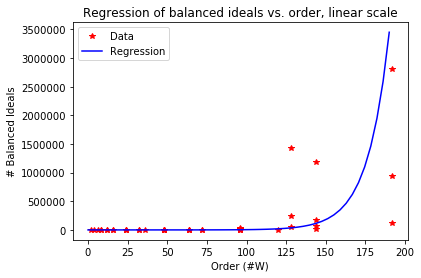

In [33]:
os.chdir("/home/jvacca4/fig/")
plt.figure()
plt.plot(x,y,"r*",label="Data")
plt.plot(model_x,model_y,"b-",label="Regression")
plt.title("Regression of balanced ideals vs. order, linear scale")
plt.legend()
plt.xlabel("Order (#W)")
plt.ylabel("# Balanced Ideals")
plt.savefig("lin.png")

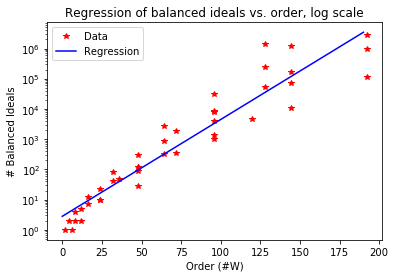

In [29]:
os.chdir("/home/jvacca4/fig/")
plt.figure()
plt.plot(x,y,"r*",label="Data")
plt.plot(model_x,model_y,"b-",label="Regression")
plt.yscale("log")
plt.title("Regression of balanced ideals vs. order, log scale")
plt.legend()
plt.xlabel("Order (#W)")
plt.ylabel("# Balanced Ideals")
plt.savefig("log.png")